In [2]:
import pandas as pd
from dataprep.eda import create_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [4]:
def one_hot_encoding(fitbit):
    # badgeType encoding
    s = fitbit['badgeType']
    dum = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
    df = pd.concat([s, dum], axis=1)
    fitbit = pd.concat([fitbit, df], axis=1)
    fitbit = fitbit.drop(columns='badgeType')

    # activity type encoding
    s = fitbit['activityType']
    dum = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
    df = pd.concat([s, dum], axis=1)
    fitbit = pd.concat([fitbit, df], axis=1)
    fitbit = fitbit.drop(columns='activityType')

    # mindfulness session encoding - highly imbalanced
    fitbit['mindfulness_session'].replace(to_replace=['False', True], value=[0, 1], inplace=True)

    # age encoding
    fitbit['age'].replace(to_replace=['<30', '>=30'], value=[0, 1], inplace=True)

    # gender encoding
    fitbit['gender'].replace(to_replace=['MALE', 'FEMALE'], value=[0, 1], inplace=True)

    # bmi encoding
    fitbit['bmi'] = fitbit['bmi'].fillna(fitbit['bmi'].mode().iloc[0])
    fitbit["bmi"] = fitbit["bmi"].apply(lambda x: 31.0 if x == '>=30' else x)
    fitbit["bmi"] = fitbit["bmi"].apply(lambda x: 18.0 if x == '<19' else x)
    fitbit["bmi"] = fitbit["bmi"].apply(lambda x: 26.0 if x == '>=25' else x)  # it belongs to overweight
    fitbit["bmi"] = fitbit["bmi"].apply(lambda x: 31 if x == '>=30' else x)
    fitbit['bmi'] = fitbit.bmi.apply(lambda bmi: 'Underweight' if bmi < 18.5 else ('Normal' if bmi < 25 else (
        'Overweight' if bmi < 30 else 'Obese')))  # 0: Underweight, 1: Normal, 2: Overweight, 3: Obese

    # ECG alert encoding
    fitbit['heart_rate_alert'].replace(to_replace=['NONE', 'LOW_HR'], value=[0, 1], inplace=True)

    return fitbit


In [5]:
df=pd.read_pickle('../data/unified_dataframe/data_unprocessed.pkl')
df.head()

id       date  nightly_temperature  nremhr   rmssd  \
0  621e2e8e67b776a24055b564 2021-05-24            34.137687  57.432  89.603   
1  621e328667b776a240281372 2021-05-24                  NaN     NaN     NaN   
2  621e326767b776a24012e179 2021-05-24                  NaN  46.120  53.968   
3  621e332267b776a24092a584 2021-05-24                  NaN     NaN     NaN   
4  621e333567b776a240a0c217 2021-05-24                  NaN     NaN     NaN   

   spo2  full_sleep_breathing_rate  stress_score  sleep_points_percentage  \
0   NaN                       14.8          78.0                 0.833333   
1   NaN                        NaN           NaN                      NaN   
2  95.3                       14.4          80.0                 0.666667   
3   NaN                        NaN           NaN                      NaN   
4   NaN                        NaN           NaN                      NaN   

   exertion_points_percentage  ...  label_ttm_stage  \
0                       0.675  ...      Maintenance   
1                         NaN  ...      Maintenance   
2                       0.925  ...      Maintenance   
3                         NaN  ...      Maintenance   
4                         NaN  ...    Contemplation   

   label_breq_self_determination label_sema_negative_feelings  \
0           intrinsic_regulation                          NaN   
1           intrinsic_regulation                          NaN   
2                            NaN                          NaN   
3          identified_regulation                          NaN   
4           intrinsic_regulation                          NaN   

   label_ipip_extraversion_category  label_ipip_agreeableness_category  \
0                               LOW                                LOW   
1                              HIGH                            AVERAGE   
2                               NaN                                NaN   
3                               LOW                                LOW   
4                           AVERAGE                               HIGH   

   label_ipip_conscientiousness_category label_ipip_stability_category  \
0                                   HIGH                          HIGH   
1                                   HIGH                           LOW   
2                                    NaN                           NaN   
3                                    LOW                       AVERAGE   
4                                AVERAGE                           LOW   

   label_ipip_intellect_category  label_stai_stress_category  \
0                        AVERAGE                         NaN   
1                            LOW                         NaN   
2                            NaN                         NaN   
3                           HIGH                         NaN   
4                            LOW                         NaN   

   label_panas_negative_affect  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 56 columns]

In [6]:
df.columns

Index(['id', 'date', 'nightly_temperature', 'nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score', 'sleep_points_percentage',
       'exertion_points_percentage', 'responsiveness_points_percentage',
       'daily_temperature_variation', 'badgeType', 'calories',
       'filteredDemographicVO2Max', 'distance', 'activityType', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session',
       'scl_avg', 'resting_hr', 'sleep_duration', 'minutesToFallAsleep',
       'minutesAsleep', 'minutesAwake', 'minutesAfterWakeup',
       'sleep_efficiency', 'sleep_deep_ratio', 'sleep_wake_ratio',
       'sleep_light_ratio', 'sleep_rem_ratio', 'steps',
       'minutes_in_default_zone_1', 'minutes_below_default_zone_1',
       'minutes_in_default_zone_2', 'minutes_in_default_zone_3', 'age',
       'gender', 'bmi', 'heart_rate_alert', 'startTime', 'endTime',
       'label_ttm_stage', 'label_breq_sel

In [7]:
df = one_hot_encoding(df)

In [8]:
#create_report(df).show_browser()

In [9]:
df['age'].value_counts()

1.0    3766
0.0    3705
Name: age, dtype: int64

In [10]:
df['gender'].value_counts()

0.0    4655
1.0    2949
Name: gender, dtype: int64

In [11]:
df['bmi'].value_counts()

Normal         5029
Overweight     1822
Underweight     556
Obese           397
Name: bmi, dtype: int64

In [12]:
df['label_ttm_stage'].value_counts()

Maintenance         1813
Contemplation       1661
Action              1173
Preparation         1158
Precontemplation     574
Name: label_ttm_stage, dtype: int64

In [13]:
df['label_breq_self_determination'].value_counts()

intrinsic_regulation      2782
identified_regulation     2631
introjected_regulation     583
amotivation                267
Name: label_breq_self_determination, dtype: int64

In [14]:
df['label_ipip_extraversion_category'].value_counts()

AVERAGE    2206
LOW        1938
HIGH       1899
Name: label_ipip_extraversion_category, dtype: int64

In [15]:
df['label_ipip_agreeableness_category'].value_counts()

HIGH       2342
AVERAGE    2176
LOW        1525
Name: label_ipip_agreeableness_category, dtype: int64

In [16]:
df['label_ipip_conscientiousness_category'].value_counts()

HIGH       2507
LOW        1948
AVERAGE    1588
Name: label_ipip_conscientiousness_category, dtype: int64

In [17]:
df['label_ipip_stability_category'].value_counts()

AVERAGE    2230
HIGH       1978
LOW        1835
Name: label_ipip_stability_category, dtype: int64

In [18]:
df['label_ipip_intellect_category'].value_counts()

AVERAGE    2660
HIGH       1938
LOW        1445
Name: label_ipip_intellect_category, dtype: int64

In [19]:
df['label_stai_stress_category'].value_counts()

Average          187
Below average    174
Above average    173
Name: label_stai_stress_category, dtype: int64

In [20]:
df['label_panas_negative_affect'].value_counts()

Below average    190
Average          169
Above average    149
Name: label_panas_negative_affect, dtype: int64

In [21]:
df = df.replace(['Maintenance', 'Contemplation', 'Action', 'Preparation', 'Precontemplation', 'intrinsic_regulation', 'identified_regulation', 'introjected_regulation', 'amotivation', 'AVERAGE', 'LOW', 'HIGH','Below average', 'Average', 'Above average', 'Underweight', 'Normal', 'Overweight', 'Obese'],
                [0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3])

In [22]:
df = df[['nremhr', 'rmssd', 'spo2',
       'full_sleep_breathing_rate', 'stress_score','daily_temperature_variation', 'calories',
       'filteredDemographicVO2Max', 'distance', 'bpm',
       'lightly_active_minutes', 'moderately_active_minutes',
       'very_active_minutes', 'sedentary_minutes', 'mindfulness_session', 'resting_hr', 'sleep_duration', 'steps', 'age',
       'gender', 'bmi', 'startTime', 'endTime',
       'label_ttm_stage', 'label_breq_self_determination',
       'label_sema_negative_feelings', 'label_ipip_extraversion_category',
       'label_ipip_agreeableness_category',
       'label_ipip_conscientiousness_category',
       'label_ipip_stability_category', 'label_ipip_intellect_category',
       'label_stai_stress_category', 'label_panas_negative_affect']]

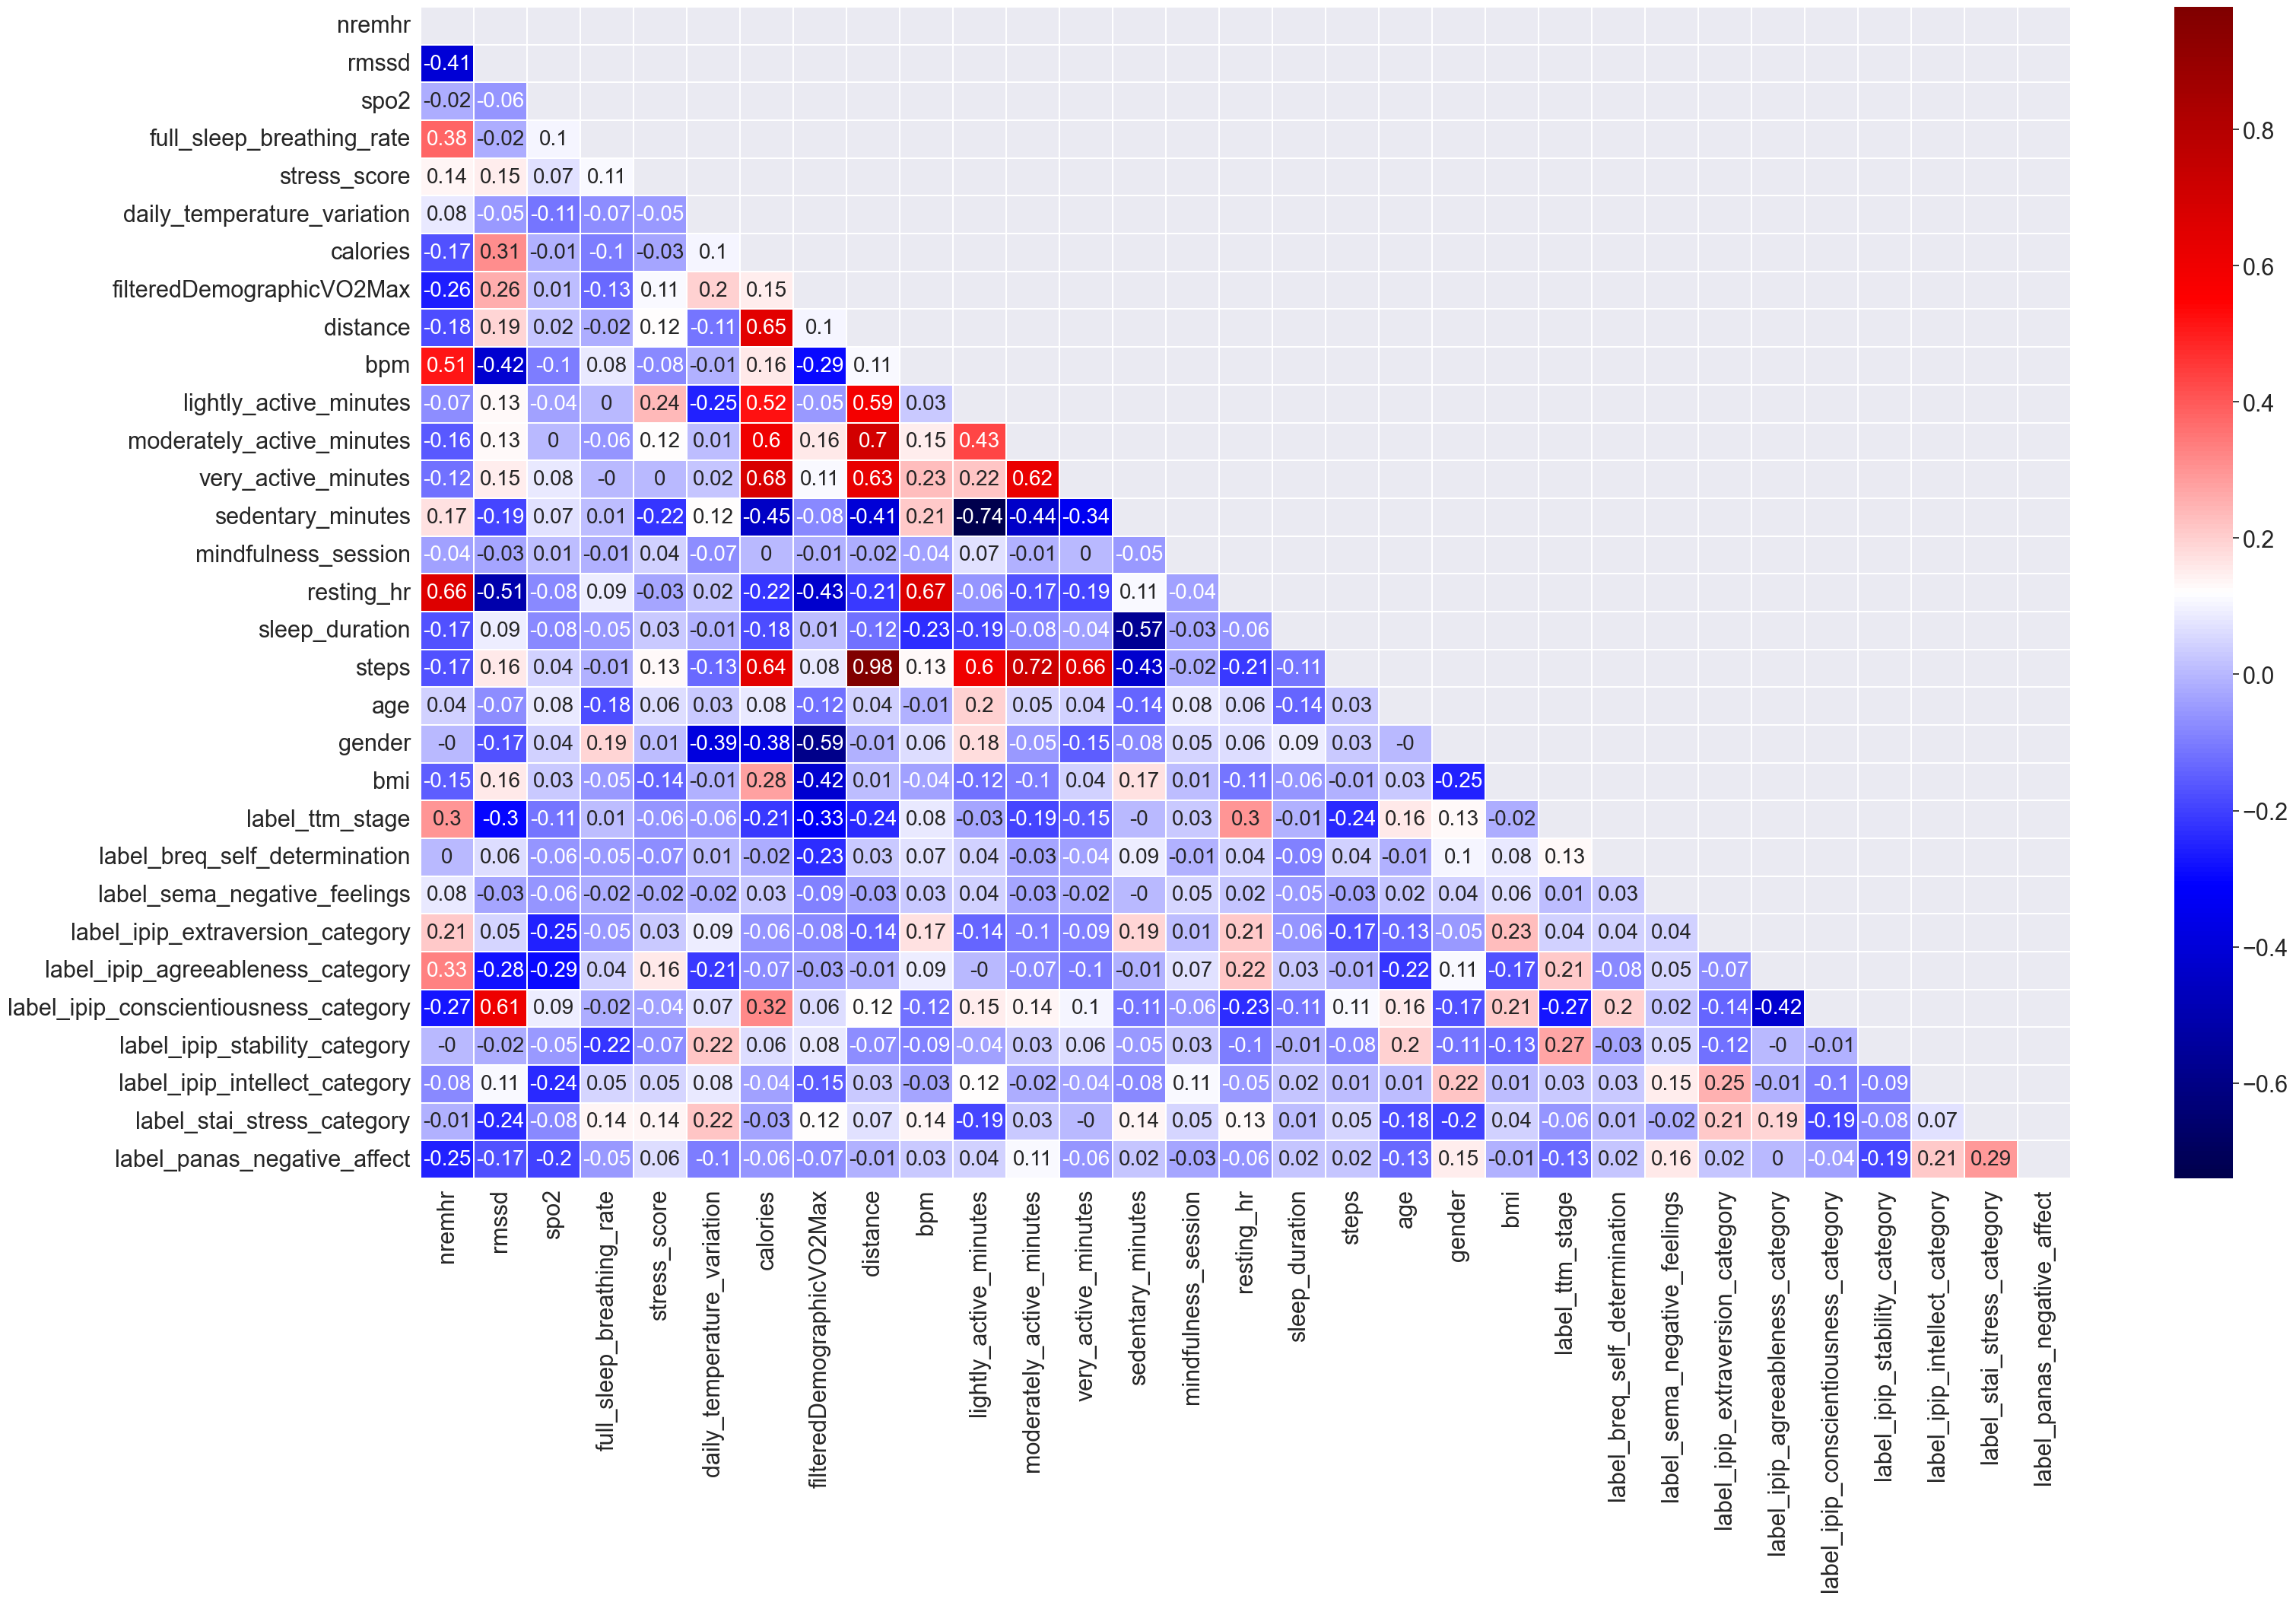

In [23]:
fig = plt.gcf()
fig.set_size_inches(35, 20)
correlation_matrix = df.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.set(font_scale = 2)
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap,mask=mask, annot_kws={"size":20}, linewidths=0.1)
plt.savefig("visualizations/correlation_matrix_summary.png",bbox_inches='tight')
plt.savefig("visualizations/correlation_matrix_summary.eps",bbox_inches='tight')